In [2]:
import os
import shutil
import subprocess
import gc
import xarray as xr
import numpy as np
import pygmt
import geopandas as gpd
import xarray as xr
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import rc
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.transforms import Bbox
from matplotlib.patches import FancyBboxPatch
from matplotlib.font_manager import FontProperties
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

In [28]:
# Initial setup
path = os.getcwd().split('/') # Get local file
machine_path = '/'+path[1]+'/'+path[2] # Select home according to OS.
# local = True
local = False
# file = 'Priestley-McKenzie_2013.csv'
file = 'Priestley-McKenzie_2013.tab'

if(local==True):
    model_path = machine_path + file
else:
    # scenario = '/RFT_Clc1_DT200_PT1292oC_lit80km_1x1km2_NHK'
    external_media = 'Joao_Macedo'
    file_path = f"/media/{machine_path.split('/')[-1]}/{external_media}/{file}"


In [32]:
df = pd.read_csv(file_path, names=['lat', 'lon', 'thick'], skiprows=13, delimiter='\t')
data_to_gridding = np.asarray([df['lon'], df['lat'], df['thick']]).T
grid = pygmt.surface(data=data_to_gridding, spacing=1, region=[-180, 180, -89, 89])

# np.savetxt(f"/media/{machine_path.split('/')[-1]}/{external_media}/Priestley-McKenzie_2013.txt",
#            data_to_gridding,
#            delimiter=' ',
#            header='lon lat thick')

surface [WARNING]: 1058 unusable points were supplied; these will be ignored.
surface [WARNING]: You should have pre-processed the data with block-mean, -median, or -mode.
surface [WARNING]: Check that previous processing steps write results with enough decimals.
surface [WARNING]: Possibly some data were half-way between nodes and subject to IEEE 754 rounding.


In [44]:
gdf = gpd.read_file(f"/media/{machine_path.split('/')[-1]}/{external_media}/pangea_shapefiles/pangea.shp")

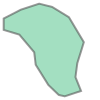

In [61]:
gdf.geometry[0]

In [55]:
# shapes = []

# for data in gdf.geometry:
#     shapes.append(data)


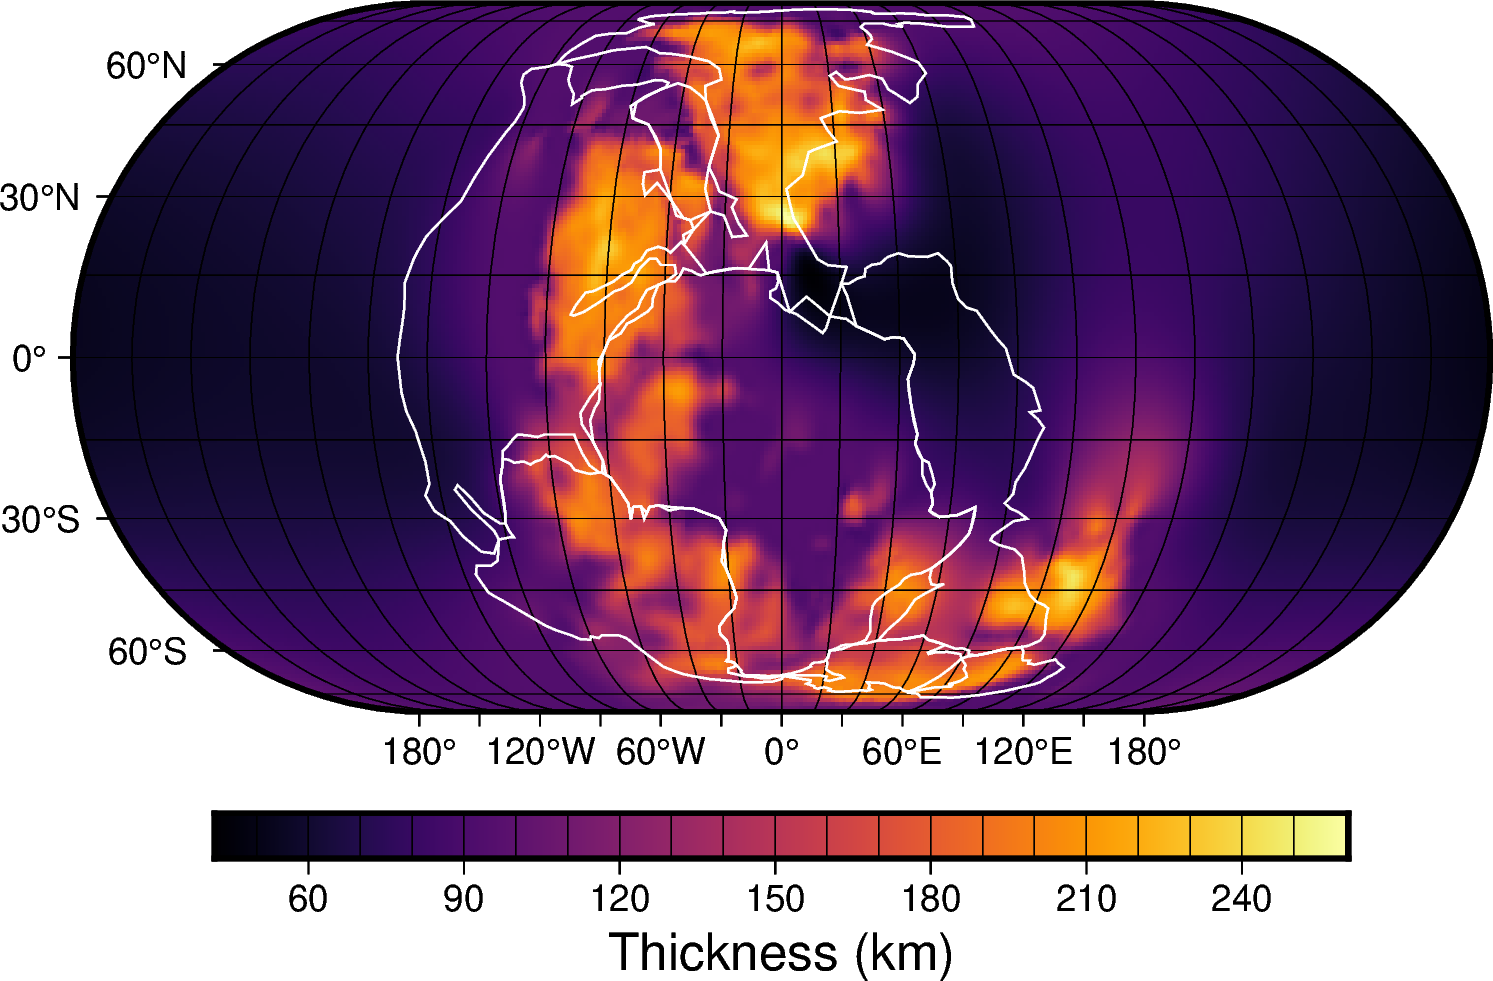

In [74]:
fig = pygmt.Figure()


region = [-180, 180, -89, 89]
# region = [-120, 120, -89, 89]
# projection = 'Cyl_stere/30/-20/12c'
# projection = 'W12c'
projection = 'Kf12c' 
# projection = 'N12c'

# fig.plot(data, style='c0.1c')
fig.grdimage(grid=grid,
            #  cmap="vik",
             cmap='inferno',
             region=region,
             projection=projection,
             frame="a30g"
             )
# fig.grdimage(grid=f"/media/{machine_path.split('/')[-1]}/{external_media}/Pangea_Litho_Thickness.grd",
#              region=region,
#              projection=projection,
#              frame="a30g",
#              cmap="vik"
#              )

fig.colorbar(frame=["a30g", "x+lThickness (km)"])

fig.plot(data=gdf.geometry, pen="0.5p,white")
# for data_shp in shapes:
#     fig.plot(data=data_shp)
    
# fig.coast(shorelines=True, resolution="10m", area_thresh=10000, frame="a30g")

fig.show()

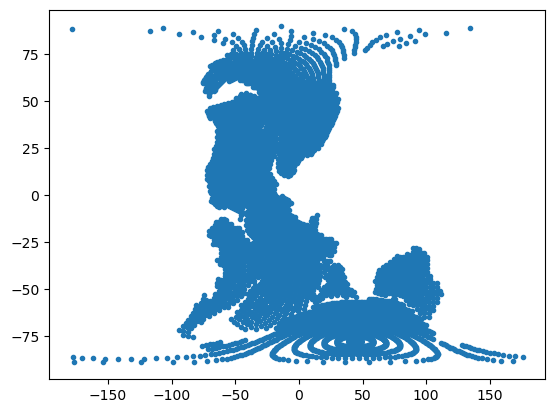

In [6]:
plt.plot(df['lon'], df['lat'], '.')

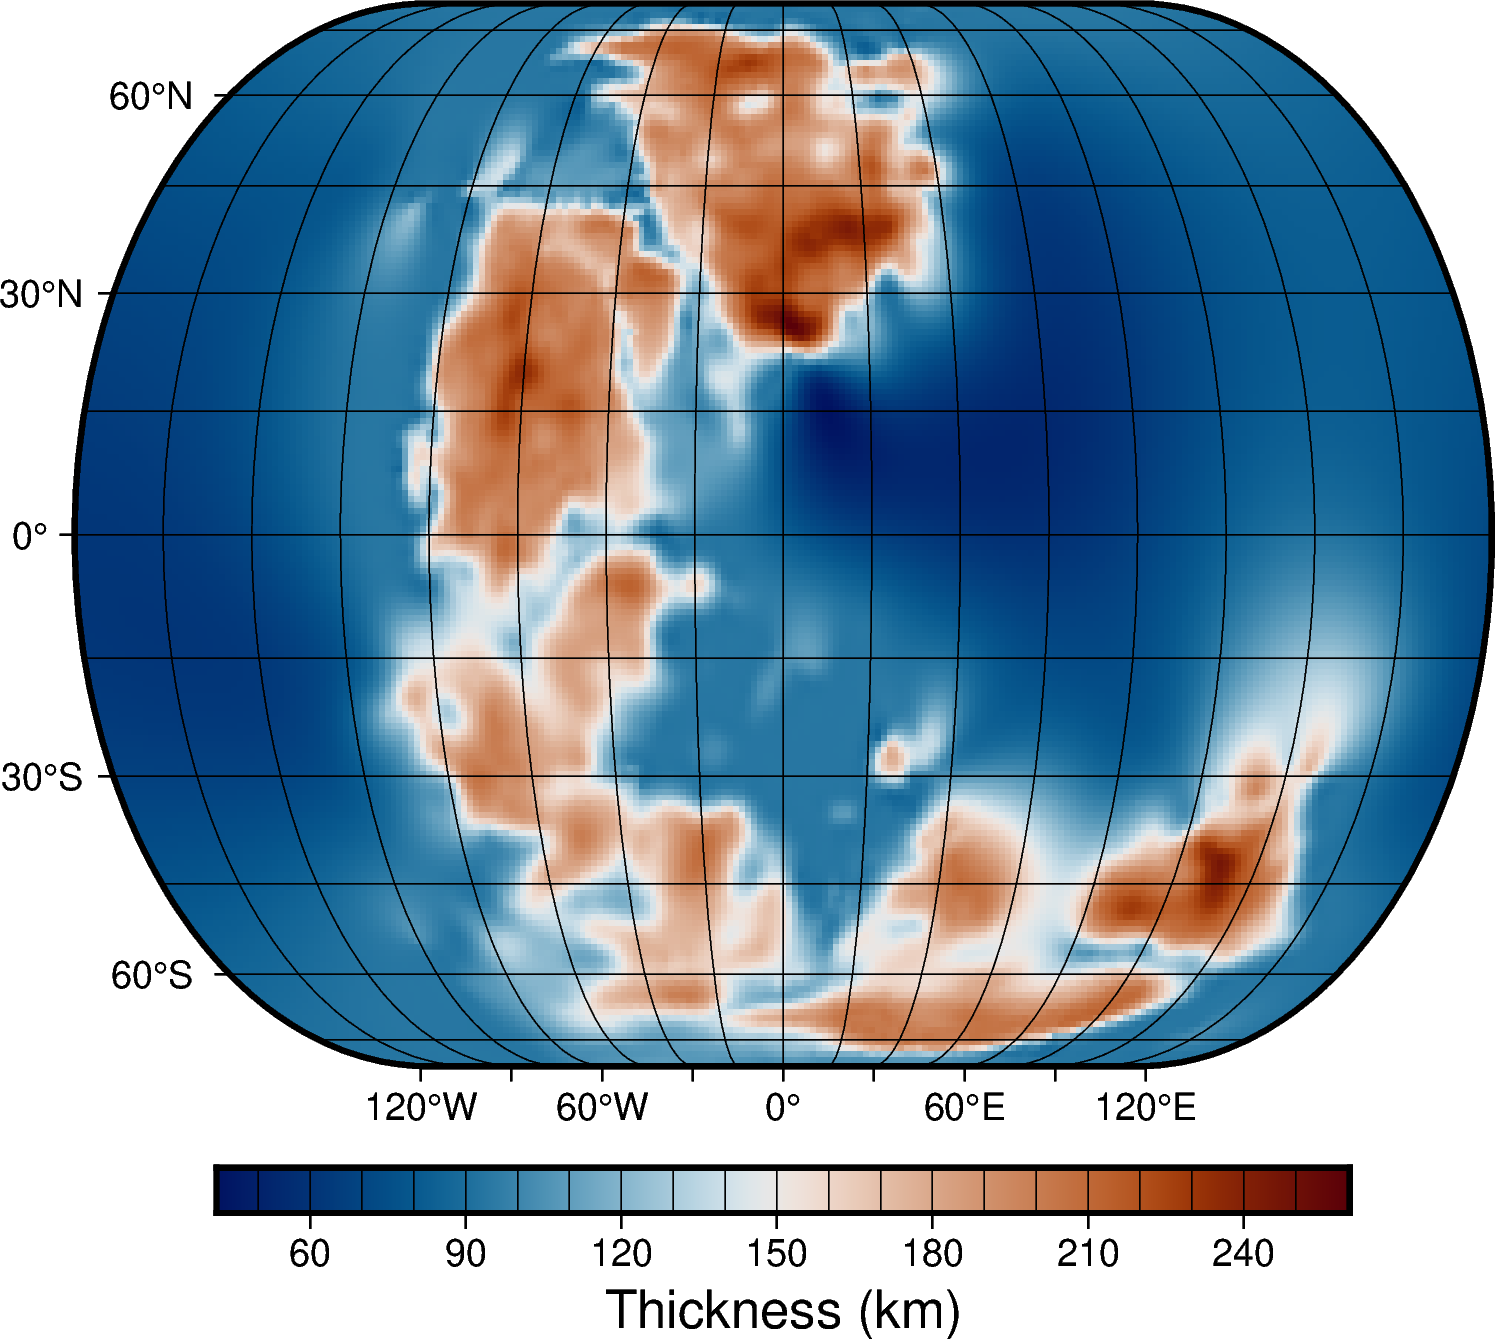